In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.combine import SMOTETomek 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix,f1_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier

In [2]:
app = pd.read_csv('dataset/application_record.csv')
credit = pd.read_csv('dataset/credit_record.csv')

app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Number of people working status:
count       304354
unique          18
top       Laborers
freq         78240
Name: OCCUPATION_TYPE, dtype: object

304354

[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


/var/folders/nr/_twls829787gd85msgv39nzr0000gn/T/ipykernel_5493/3477167925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OCCUPATION_TYPE', data=app, palette='Set2', legend=False)


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

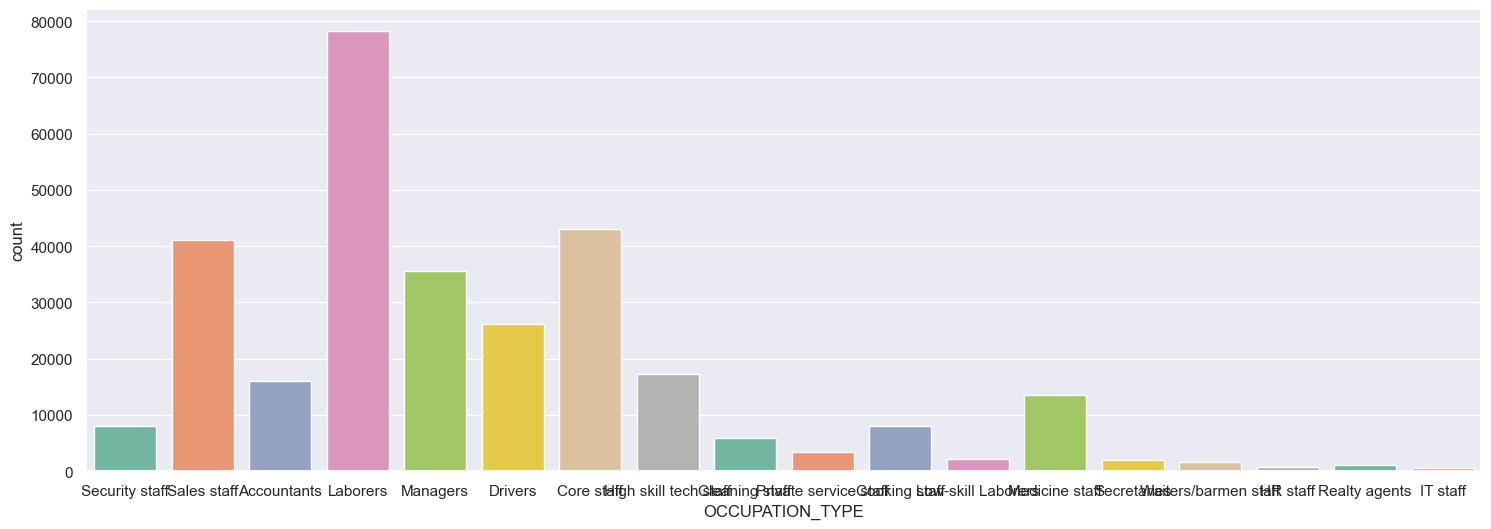

In [3]:
print('Number of people working status:')
print(app['OCCUPATION_TYPE'].describe())
print()
hi=app['OCCUPATION_TYPE']
print(hi.count())
print()
print(app['OCCUPATION_TYPE'].unique())
sns.set(rc= {'figure.figsize':(18,6)})
sns.countplot(x='OCCUPATION_TYPE', data=app, palette='Set2', legend=False)

Types of house of the peoples :
<class 'pandas.core.series.Series'>
RangeIndex: 438557 entries, 0 to 438556
Series name: NAME_HOUSING_TYPE
Non-Null Count   Dtype 
--------------   ----- 
438557 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB
None


/var/folders/nr/_twls829787gd85msgv39nzr0000gn/T/ipykernel_5493/3882445410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette='Set2', legend=False)


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

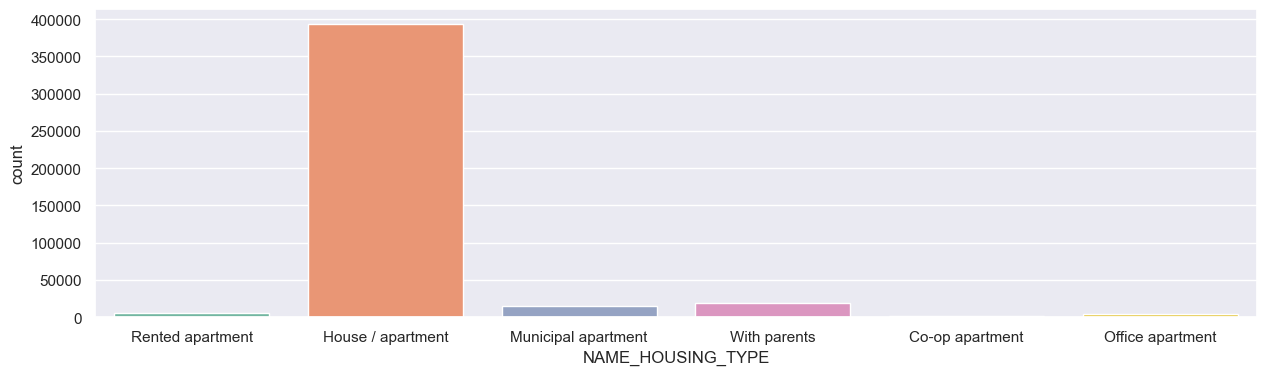

In [4]:
print('Types of house of the peoples :')
print(app['NAME_HOUSING_TYPE'].info())
sns.set(rc= {'figure.figsize':(15,4)})
sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette='Set2', legend=False)

Income yypes of the Person :
438557


/var/folders/nr/_twls829787gd85msgv39nzr0000gn/T/ipykernel_5493/37354425.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_INCOME_TYPE', data=app, palette='Set2', legend=False)


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

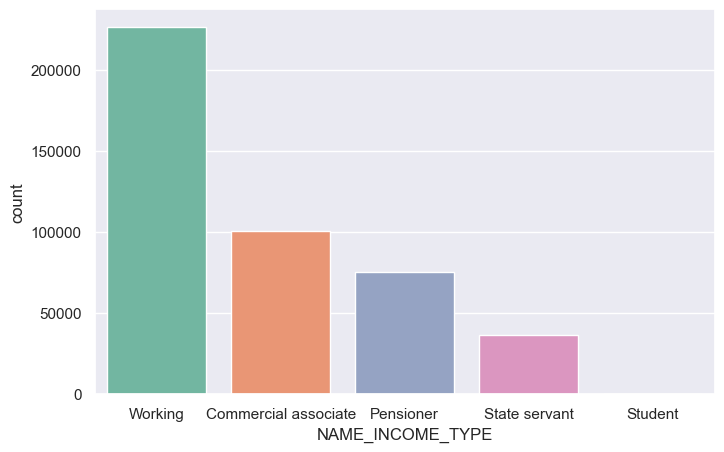

In [5]:
print('Income yypes of the Person :')
print(app['NAME_INCOME_TYPE'].count())
sns.set(rc= {'figure.figsize':(8,5)})
sns.countplot(x='NAME_INCOME_TYPE', data=app, palette='Set2', legend=False)

In [6]:
print(app.dtypes)

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


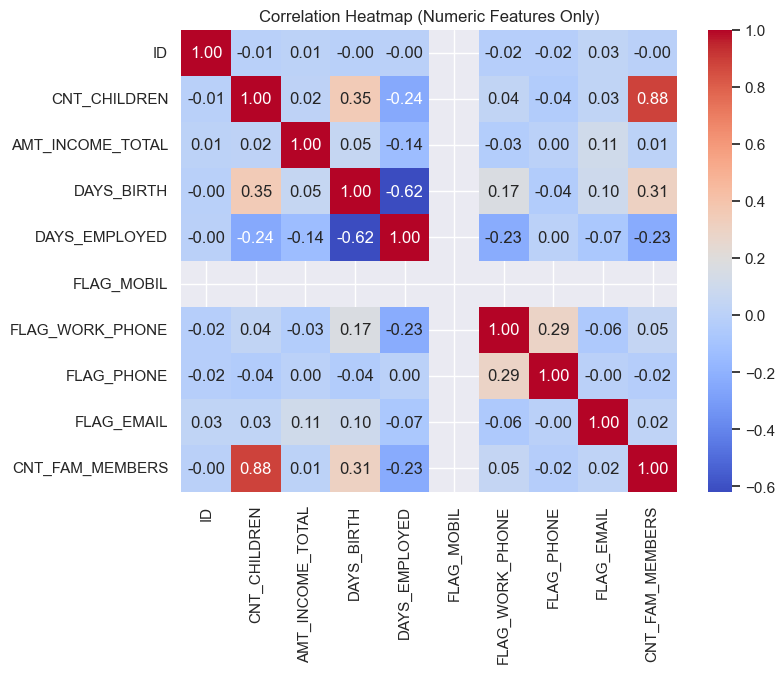

In [7]:
# Select only numeric columns
numeric_app = app.select_dtypes(include=['int64', 'float64'])

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_app.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [8]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# Data Pre-Processing

## Drop unwanted features
#### Generally, applicant ids are unique in nature. But in our dataset we found some of the ids are repeating multiple times. To handle this we have to remove the duplicate rows. Drop duplicates() function from pandas is used to remove the duplicate rows.

In [9]:
app.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
                              'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                              'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
                              'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                              'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep = 'first', inplace = True)

In [10]:
app.isnull().mean()

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.305012
CNT_FAM_MEMBERS        0.000000
dtype: float64

In [11]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_CHILDREN']
    data = data.drop(dropped_cols, axis=1)
    
    # converting birth years and days employed to years.
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH'] / 365)  # Absolute
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] / 365

    # Cleaning up categorical values to lower the count of dummy variables. 
    housing_type = {
        'House / apartment': 'House / apartment',
        'With parents': 'With parents',
        'Municipal apartment': 'House / apartment',
        'Rented apartment': 'House / apartment',
        'Office apartment': 'House / apartment',
        'Co-op apartment': 'House / apartment'
    }

    income_type = {
        'Commercial associate': 'Working',
        'State servant': 'Working',
        'Working': 'Working',
        'Pensioner': 'Pensioner',
        'Student': 'Student'
    }
    
    education_type = {
        'Secondary / secondary special': 'secondary',
        'Lower secondary': 'secondary',
        'Higher education': 'Higher education',
        'Incomplete higher': 'Higher education',
        'Academic degree': 'Academic degree'  # Fixed typo here too
    }
    
    family_status = {
        'Single / not married': 'Single',
        'Separated': 'Single',
        'Widow': 'Single',
        'Civil marriage': 'Married',
        'Married': 'Married'
    }

    # Replace original columns instead of creating new ones
    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].map(family_status)
    
    return data


In [12]:
app.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [13]:
cleansed_app = data_cleansing(app)

In [14]:
cleansed_app.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [15]:
cleansed_app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0
2,5008806,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0
3,5008808,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0
7,5008812,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0
10,5008815,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0
13,5008819,M,Y,Y,135000.0,Working,secondary,Married,House / apartment,48.706849,-3.271233,2.0
19,5008825,F,Y,N,130500.0,Working,Higher education,Married,House / apartment,29.230137,-3.021918,2.0
21,5008830,F,N,Y,157500.0,Working,secondary,Married,House / apartment,27.482192,-4.024658,2.0
24,5008834,F,N,Y,112500.0,Working,secondary,Single,House / apartment,30.049315,-4.438356,3.0
27,5008836,M,Y,Y,270000.0,Working,secondary,Married,House / apartment,34.764384,-3.186301,8.0


In [16]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [17]:
credit.shape

(1048575, 3)

In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [19]:
# Data frame to analyze Length of time since initial approval Of credit card 
# Shows number of past dues, paid off and no loan status. 
grouped = credit.groupby('ID')
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = "STATUS")
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() 
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] 
pivot_tb['window'] += 1 # Adding 1 since month starts at .o 

#Counting number of past dues, paid offs and no loans.

pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'c'].count(axis = 1) 
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1) 
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1) 
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1) 
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1) 
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1) 
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1) 
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1) 
# Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

In [20]:
pivot_tb.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,0,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,17,0,0,0,0,0,0,5001717
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,0,24,2,0,0,0,0,10,5001718
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,0,2,0,0,0,0,0,0,5001719
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36,0,29,7,0,0,0,0,0,5001720


In [21]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89']
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']
        
        overall_pastdues = over_1+over_30+over_60+over_90+over_120
        
        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)

        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)
        else:
            good_or_bad.append(1)

    return good_or_bad

In [22]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values+ pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values

target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)

#cleansed_app = app.dropna(subset=['OCCUPATION_TYPE'])
credit_app = cleansed_app.merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

In [23]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0,0,2,1,0
1,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0,0,7,16,0
2,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
3,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
4,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,F,N,N,180000.0,Pensioner,secondary,Married,House / apartment,56.438356,-0.542466,2.0,0,21,0,0
9705,F,N,Y,112500.0,Working,secondary,Married,House / apartment,43.389041,-7.380822,2.0,0,12,0,0
9706,M,Y,Y,90000.0,Working,secondary,Married,House / apartment,52.331507,-4.715068,2.0,0,17,5,0
9707,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,2.0,0,19,0,0


In [24]:
credit_app.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
paid_off               0
#_of_pastdues          0
no_loan                0
target                 0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()

credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])

In [26]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,1,1,1,427500.0,2,1,0,0,32.890411,-12.443836,2.0,0,2,1,0
1,1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,0,7,16,0
2,0,0,1,270000.0,2,2,1,0,52.356164,-8.358904,1.0,0,2,3,0
3,0,0,1,283500.0,0,1,1,0,61.545205,1000.665753,1.0,0,14,3,0
4,1,1,1,270000.0,2,1,0,0,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,0,2,0,0,56.438356,-0.542466,2.0,0,21,0,0
9705,0,0,1,112500.0,2,2,0,0,43.389041,-7.380822,2.0,0,12,0,0
9706,1,1,1,90000.0,2,2,0,0,52.331507,-4.715068,2.0,0,17,5,0
9707,0,0,1,157500.0,0,1,0,0,33.936986,-3.630137,2.0,0,19,0,0


#### inverse_transform : - Transform labels back to original encoding.

In [27]:
print("CODE_GENDER", credit_app['CODE_GENDER'].unique())
print(cg.inverse_transform(list(credit_app['CODE_GENDER'].unique())))
print()
print("FLAG_OWN_CAR:", credit_app['FLAG_OWN_CAR'].unique())
print(oc.inverse_transform(list (credit_app['FLAG_OWN_CAR'].unique())))
print()
print("FLAG_OWN_REALTY", credit_app['FLAG_OWN_REALTY'].unique())
print(own_r.inverse_transform(list(credit_app['FLAG_OWN_REALTY'].unique())))
print()
print("NAME_INCOME_TYPE", credit_app['NAME_INCOME_TYPE'].unique())
print(it.inverse_transform(list(credit_app['NAME_INCOME_TYPE'].unique())))
print()
print("NAME_EDUCATION_TYPE", credit_app['NAME_EDUCATION_TYPE'].unique())
print(et.inverse_transform(list(credit_app['NAME_EDUCATION_TYPE'].unique())))
print()
print("NAME_FAMILY_STATUS", credit_app['NAME_FAMILY_STATUS'].unique())
print(fs.inverse_transform(list(credit_app['NAME_FAMILY_STATUS'].unique())))
print()
print("NAME_HOUSING_TYPE", credit_app['NAME_HOUSING_TYPE'].unique())
print(ht.inverse_transform(list(credit_app['NAME_HOUSING_TYPE'].unique())))

CODE_GENDER [1 0]
['M' 'F']

FLAG_OWN_CAR: [1 0]
['Y' 'N']

FLAG_OWN_REALTY [1 0]
['Y' 'N']

NAME_INCOME_TYPE [2 0 1]
['Working' 'Pensioner' 'Student']

NAME_EDUCATION_TYPE [1 2 0]
['Higher education' 'secondary' 'Academic degree']

NAME_FAMILY_STATUS [0 1]
['Married' 'Single']

NAME_HOUSING_TYPE [0 1]
['House / apartment' 'With parents']


## Splitting data into train and test
#### Now let’s split the Dataset into train and test sets. For splitting training and testing data we are using the train_test_split() function from sklearn. As parameters, we are passing x, y, train_size, random_state. X is independent variable and y is dependent variable.

In [28]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']

xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)

# Model Building

## Logistic Regression Model
#### A function named logistic_reg is created and train and test data are passed as the parameters. Inside the function, LogisticRegression() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable. For evaluating the model, confusion matrix and classification report is done.

In [29]:
def logistic_reg(xtrain,xtest, ytrain, ytest):
    lr=LogisticRegression(solver='liblinear')
    lr.fit(xtrain, ytrain)
    ypred=lr.predict(xtest)
    
    print('***LogisticRegression***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report (ytest, ypred))

## Random Forest Classifier
#### A function named random_forest is created and train and test data are passed as the parameters. Inside the function, RandomForestClassifier() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable. For evaluating the model, confusion matrix and classification report is done.

In [30]:
def random_forest(xtrain,xtest, ytrain, ytest):
    rf=RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    ypred=rf.predict(xtest)
    
    print('***Random ForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest, ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))

## Xgboost Model
#### A function named g_boosting is created and train and test data are passed as the parameters. Inside the function, GradientBoostingClassifier() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable. For evaluating the model, confusion matrix and classification report is done.

In [31]:
def g_boosting(xtrain, xtest, ytrain, ytest):
    gb=GradientBoostingClassifier()
    gb.fit(xtrain, ytrain)
    ypred=gb.predict(xtest)
    
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))

## Decision tree model
#### A function named d_tree is created and train and test data are passed as the parameters. Inside the function, DecisionTreeClassifier() algorithm is initialized and training data is passed to the model with .fit() function. Test data is predicted with .predict() function and saved in new variable. For evaluating the model, confusion matrix and classification report is done.

In [32]:
def d_tree(xtrain, xtest, ytrain, ytest):
    dt=DecisionTreeClassifier()
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report (ytest, ypred))

## Compare the models
#### For comparing the above four models compareModel function is defined. 

#### After calling the function, the results of models are displayed below as an output. From these four model we found decision tree model performs well. Accuracy of decision tree model is 99%. So, this model is saved and used on flask integration.

In [33]:
def compare_model(xtrain, xtest, ytrain,ytest):
    logistic_reg(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    random_forest(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    g_boosting(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    d_tree(xtrain, xtest, ytrain,ytest)
    

In [34]:
compare_model (xtrain, xtest, ytrain, ytest)

***LogisticRegression***
Confusion matrix
[[1680   21]
 [ 129  112]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1701
           1       0.84      0.46      0.60       241

    accuracy                           0.92      1942
   macro avg       0.89      0.73      0.78      1942
weighted avg       0.92      0.92      0.91      1942

----------------------------------------------------------------------------------------------------
***Random ForestClassifier***
Confusion matrix
[[1701    0]
 [   0  241]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       241

    accuracy                           1.00      1942
   macro avg       1.00      1.00      1.00      1942
weighted avg       1.00      1.00      1.00      1942

----------------------------------------------------------

## Save the model
#### Decision tree model is saved by pickle.dump() function. It saves the model as .pkl file.

In [35]:
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred=dt.predict(xtest)

import pickle
pickle.dump(dt,open("model.pkl","wb"))